# Homework Python 3

С базовыми фичами языка можно ознакомиться [в теории](01_tt_python.md).

Для закрепления знаний, решите следующие задачи.

# Задание 1. Word Count

Посчитать сколько раз каждое слово повторялось в тексте. Вывести 10 самых частых слов отсортированных по частоте. Игнорировать однобуквенные слова и пунктуацию. Слова в предложении - это наборы символов отделенные друг от друга пробельными символами (пробел, табуляция, новая строка).

**Hint**: вам понадобится `dict` и метод `get(key)`, который возвращает `None`, если значения отсутсвует.

**Advanced**: Нарисуйте bar-plot график количества слов в предложении. (Используйте библиотеку seaborn)

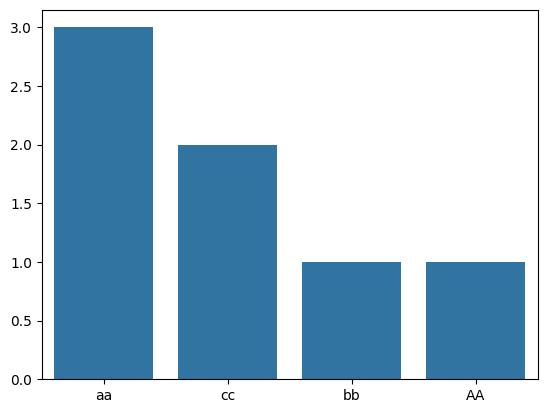

In [1]:
import seaborn as sns
import re

def word_count(text):
    text = re.sub(r'[^\w\s]', '', text) # Удаляем пунктуацию и приводим к нижнему регистру
    dict = {}
    for word in text.split():
        if len(word) > 1:
          dict[word] = dict.get(word, 0) + 1
    words = []
    counts = []
    top10 = sorted(dict.items(), key=lambda item: item[1], reverse=True)[:10]
    for word, count in top10:
      words.append(word)
      counts.append(count)
    sns.barplot(x=words, y=counts)
word_count("aa aa aa bb cc cc A B C a AA")


In [2]:
# Это магия для ввода текста, не трогайте её
# Выполните эту ячейку и увидите поле для ввода текста.
# Введите текст, нажмите Enter и получите ответ, который вы вычислили в функции выше
from ipywidgets import widgets
text = widgets.Text(placeholder="тут текст")
display(text)
text.on_submit(lambda txt: word_count(txt.value))

# введите число и нажмите enter

Text(value='', placeholder='тут текст')

# Задание 2. Сумма цифр числа

Посчитать сумму цифр данного натурального числа. Например, `summa(1234) == 1+2+3+4 == 10`.

In [3]:
def summa(n):
    sum = 0
    while n != 0:
      sum += n % 10
      n //= 10
    return sum
summa(1234)

10

> Человеку свойственна итерация, рекурсия – удел богов. \(James O. Coplien, Bell Labs\)

In [4]:
def summa_recursive(n):
    sum = n % 10
    n //= 10
    if n != 0:
      sum += summa_recursive(n)
    return sum

summa_recursive(1234)

10

# Задание 3. Множество

Это необязательное задание. Но можете сделать для себя, а мы сделаем вам review.

## Теория

Множество - это набор **различных** объектов. Это означает, что в нём нет повторяющихся объектов. `[1,2,3]` - множество, а `[1,2,2,3,1]` - не удовлетворяет определению.

Множество - это абстрактная структура данных и её можно реализовать несколькими способами. Но для начала определим поведения для этой абстракции.

#### Базовые операции:

Этот набор поведений определяет саму абстракцию.

- добавить элемент в множество
- объединить множества
- пересечь множества
- проверка принадлежности элемента множеству

#### Вспомогательные:

Это дополнительные функции. Они просто помогают пользоваться этой абстракцией.

- вычислить длину
- итерация по множеству
- создать множество из списка элементов
- сконвертировать множество в список

### Реализации

По определению, множество предоставляет только одну услугу - хранит только разные элементы. Порядок хранить оно не обязано, доступа по индексу тоже нет. Тогда на основе чего можно построить эту абстракцию?

#### Список

Мы можем создать множества на основе списка и просто проверять при каждой вставке в него то, есть ли в нём уже этот элемент или нет.

Преимущества:
- легко сделать

Недостатки:
- долгий поиск принадлежности и вставки O(n)
- очень долгое пересечение O(n^2)

#### Упорядоченный список

А что если хранить все элементы в списке упорядоченно? Тогда вставка будет занимать меньше времени в среднем: O(n/2). Но это тот же порядок.

#### Деревья поиска

Существует такая структура данных как дерево. Оно было создано специально для решения задачи поиска. В сбалансированном дереве поиск элемента имеет сложность O(log_2(n)), что очень хорошо. Сравните её с O(n):

![](https://habrastorage.org/getpro/habr/post_images/195/e1f/6a1/195e1f6a1379554ca9025338301a78ed.png)

__картинка взята из статьи [bigocheatsheet.com](http://bigocheatsheet.com/)__

Условия бинарного дерева поиска:

- Оба поддерева — левое и правое — являются двоичными деревьями поиска.
- У всех узлов левого поддерева произвольного узла X значения ключей данных меньше, нежели значение ключа данных самого узла X.
- У всех узлов правого поддерева произвольного узла X значения ключей данных больше либо равно, нежели значение ключа данных самого узла X.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0).

#### Хэш таблицы

Основная идея заключается в использовании некоторой хэш функции, которая возвращает некоторое число. Это число используется как индекс в массиве. Поэтому операция поиска принадлежности будет O(1). В случае коллизии хэш функции, то есть когда для разных элементов было вычислено одно и то же значение хэш функции, предусматривается некоторое специальное поведение. Например, можно по индексу хэш функции хранить не один элемент, а несколько. Если коллизий очень мало, то поиск принадлежности будет всё тот же O(1) + O(n), где n - количество элементов с одним хешем. Такой метод называется методом цепочек.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%A5%D0%B5%D1%88-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0)

## Практика

Можно сделать в функциональном, процедурном или ООП стиле.

### Задание 3.1. Множество на основе хеш-таблицы

Используйте массивы python как базовую структуру.
Реализуйте какую-нибудь функцию хеширования: например, остаток от деления на N или [mur-mur](https://ru.wikipedia.org/wiki/Murmur2). Для начала, чтобы тестировать свой код, можете использовать функцию `hash`.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

In [99]:
class Hash:
    def __init__(self, size = 100):
        self.size: int = size
        self.table: List[List[int]] = [[] for _ in range(size)]

    def hash(self, value):
        return value % self.size

    def add(self, value):
      i = self.hash(value)
      if value not in self.table[i]:
          self.table[i].append(value)

    def contain(self, value):
        return value in self.table[self.hash(value)]

    def union(self, other):
        new = Hash(self.size)
        for bucket in self.table:
            for item in bucket:
                new.add(item)
        for bucket in other.table:
            for item in bucket:
                new.add(item)
        return new

    def intersection(self, other):
        new = Hash(self.size)
        for bucket in self.table:
            for item in bucket:
                if other.contain(item):
                    new.add(item)
        return new

    def fromList(self, elements):
        for i in elements:
            self.add(i)

    def __iter__(self):
      for bucket in self.table:
          for item in bucket:
              yield item

    def __len__(self):
      sum = 0
      for bucket in self.table:
        sum += len(bucket)
      return sum

    def toList(self):
      l = []
      for item in self:
        l.append(item)
      return l

In [119]:
import time

def benchmark(hash):
    start = time.time()
    for i in range(10000):
      hash.add(i)
    stop = time.time()
    print('add: ', stop - start)

    start = time.time()
    for i in range(10000):
      hash.contain(i)
    stop = time.time()
    print('contain: ', stop - start)

    hash1 = Hash()
    hash1.fromList(range(0, 10000))
    start = time.time()
    union = hash.union(hash1)
    stop = time.time()
    print('union: ', stop - start)

    start = time.time()
    intersection = hash.intersection(hash1)
    stop = time.time()
    print('intersection: ', stop - start)

a = Hash()
benchmark(a)

add:  0.010123014450073242
contain:  0.010781049728393555
union:  0.01985025405883789
intersection:  0.01991415023803711


### Задание 3.2. Множество на основе дерева

Реализуйте множество на основе бинарного дерева поиска. Если вам понадобится массив, то используйте только ваш список из предыдущей практики.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

Сравните скорость работы каждой реализации множества.

In [120]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class Tree:
    def __init__(self):
        self.root = None

    def add(self, value):
        if not self.root:
            self.root = Node(value)
            return

        current = self.root
        while current:

            if value < current.value:
                if current.left is None:
                    current.left = Node(value)
                    return
                current = current.left

            elif value > current.value:
                if current.right is None:
                    current.right = Node(value)
                    return
                current = current.right

            else:
                return

    def contains(self, value: int) -> bool:
        current = self.root

        while current:

            if value == current.value:
                return True

            elif value < current.value:
                current = current.left

            else:
                current = current.right
        return False

    def union(self, other):
        new = Tree()
        for value in self:
            new.add(value)

        for value in other:
            new.add(value)
        return new

    def intersection(self, other):
        new = Tree()

        for value in self:
            if other.contains(value):
                new.add(value)
        return new

    def __len__(self):
      sum = 0
      for i in self:
        sum += 1
      return sum

    def fromList(self, elements):
        for i in elements:
            self.add(i)

    def toList(self):
      l = []
      for item in self:
        l.append(item)
      return l

In [126]:
import time

def benchmark(hash):
    start = time.time()
    for i in range(10000):
      hash.add(i)
    stop = time.time()
    print('add: ', stop - start)

    start = time.time()
    for i in range(10000):
      hash.contain(i)
    stop = time.time()
    print('contain: ', stop - start)

    hash1 = Hash()
    hash1.fromList(range(0, 10000))
    start = time.time()
    union = hash.union(hash1)
    stop = time.time()
    print('union: ', stop - start)

    start = time.time()
    intersection = hash.intersection(hash1)
    stop = time.time()
    print('intersection: ', stop - start)

a = Hash()
benchmark(a)

add:  0.017821073532104492
contain:  0.01751232147216797
union:  0.03280520439147949
intersection:  0.033284902572631836


хеш таблица быстрее чем дерево

# Задание 4. Матрицы

Реализуйте класс матрица и набор важных функций:

- сложение матриц
- умножение матрицы на число
- матричное произведение
- поиск определителя
- вычисление обратной матрицы
- транспонирование матрицы

Использовать numpy нельзя. Все матричные операции вам надо реализовать полностью самостоятельно.

Класс Matrix должен следовать принципам Data Model: https://docs.python.org/3/reference/datamodel.html

In [9]:
from typing import List
import copy
class Matrix:
    def __init__(self, data: List[List[float]]):
        self.data = data
        self.n = len(data)
        self.m = len(data[0])

    def init(self, n, m):
        new = copy.deepcopy(self)
        new.n = n
        new.m = m
        new.data = []
        for i in range(n):
          new.data.append([])
          for j in range(m):
            new.data[i].append(0)
        return new

    def __add__(self, other):
      new = copy.deepcopy(self)
      if isinstance(other, Matrix):
        if self.n != other.n or self.m != other.m:
          return
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] += other.data[i][j]
      elif isinstance(other, (float, int)):
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] += other
      return new

    def __sub__(self, other):
      new = copy.deepcopy(self)
      if isinstance(other, Matrix):
        if self.n != other.n or self.m != other.m:
          return
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] -= other.data[i][j]
      elif isinstance(other, (float, int)):
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] -= other
      return new

    def __mul__(self, other):
      new = copy.deepcopy(self)
      if isinstance(other, Matrix):
        if self.n != other.n or self.m != other.m:
          return
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] *= other.data[i][j]
      elif isinstance(other, (float, int)):
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] *= other
      return new

    def __truediv__(self, other):
      new = copy.deepcopy(self)
      if isinstance(other, Matrix):
        if self.n != other.n or self.m != other.m:
          return
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] /= other.data[i][j]
      elif isinstance(other, (float, int)):
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] /= other
      return new


    def __matmul__(self, other):
      if self.m != other.n:
        return
      new = copy.deepcopy(self)
      for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] = 0
            for k in range(other.n):
                new.data[i][j] += self.data[i][k] * other.data[k][j]
      return new


    def __neg__(self):
        new = copy.deepcopy(self)
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] = -(new.data[i][j])
        return new

    def __abs__(self):
        new = copy.deepcopy(self)
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] = abs(new.data[i][j])
        return new

    def det(self):
      if (self.n != self.m):
        return
      if (self.n == 2 and self.m == 2):
        return self.data[0][0] * self.data[1][1] - self.data[1][0] * self.data[0][1]
      if (self.n == 1 and self.m == 1):
        return self.data[0][0]

      determinant = 0
      for  j in range(self.m):
        determinant += self.data[0][j] * self.algAddition(0, j).det() * (-1)**j;
      return determinant;

    def T(self):
        new = copy.deepcopy(self)
        for i in range(self.n):
          for j in range(self.m):
            new.data[i][j] = self.data[j][i]
        return new

    def inv(self):
      det = self.det()
      new = copy.deepcopy(self)
      for i in range(self.n):
        for j in range(self.m):
          new.data[j][i] = self.algAddition(i, j).det() / det * (-1)**(i+j);
      return new

    def algAddition(self, k1, k2):
      new = self.init(self.n-1, self.m-1)
      i1 = 0
      j1 = 0
      for i in range(self.n):
        for j in range(self.m):
          if i != k1 and j != k2:
            new.data[i1][j1] = self.data[i][j]
            j1 += 1
        j1 = 0
        if i != k1:
          i1 += 1
      return new

    def __repr__(self):
        """Представление матрицы в строковом виде"""
        new = ""
        for n in self.data:
            new += " ".join(map(str, n)) + "\n"
        return new.strip()

In [10]:
A = Matrix([
    [3, 2],
    [1, 7]
])

B = Matrix([
    [8, 3],
    [1, 2]
])

In [11]:
A + B

11 5
2 9

In [12]:
A+1

4 3
2 8

In [13]:
A - B

-5 -1
0 5

In [14]:
A - 1

2 1
0 6

In [15]:
A * 7

21 14
7 49

In [16]:
A / 2

1.5 1.0
0.5 3.5

In [17]:
print(A.T())


3 1
2 7


In [18]:
print(A @ B)


26 13
15 17


In [19]:
print(A.det())


19


In [20]:
print(A.inv())

0.3684210526315789 -0.10526315789473684
-0.05263157894736842 0.15789473684210525


In [21]:
print(A @ A.inv())


0.9999999999999999 0.0
0.0 0.9999999999999999


# Список.

## Теория

Мы пойдем весьма необычным путём. В этом задании вы будете реализовывать последовательность(связный список) с помощью рекурсии и базового элемента `tuple`. Это отличается от классического связного списка, основанного на структуре и указателе `next`, когда обход бы делался с помощью `for`, пока не встретился бы _null pointer_.

Немного теории. Допустим у нас есть связная последовательность чисел ![](https://senior-sigan.ml/fcs-programming-technology/assets/linked_list.png)

Её можно представить в виде последовательности вложенных друг в друга пар: `seq=(1, (2, (3, 4)))`. Тогда чтобы взять последний элемент списка нужно сделать `seq[1][1][1]`. Или если создать специальную вспомогательную функцию `tail`: `tail(tail(tail(seq)))`, что немного математичнее.

> Использовать цикл `for`, `while` **запрещено**. Только рекурсия, только хардкор.

Можно использовать классы и переопределять операторы, но не обязательно. Как делать классы можно прочитать [тут](https://learnxinyminutes.com/docs/ru-ru/python3-ru/) или в официальной [документации](https://docs.python.org/3/tutorial/classes.html).

_Комментарий:_ ваш список должен уметь быть пустым, чтобы его длина была 0. Это потребуется в следующем задании.

Далее список задач и примеры функций. Если вы делаете в ООП стиле, то придумайте методы самостоятельно, главное чтобы идея была такая же.

### Рекурсивно связная последовательность. Easy.

- взятие элемента по индексу `at(seq(1,2,3), 1) == 2`
- вычисление длины последовательности `size(seq(1,2)) == 2`
- сравнение массивов `eq(seq(1,2), seq(1,2)) == Treu`, `eq(seq(1,2,3), seq(1,2)) == False`

### Функции над рекурсивно связаной последовательностью. Moderate.

- взятие хвоста последовательности, пропустив N значений, `eq(tail(seq(1,2,3,4), 2), seq(3,4)) == True`
- соединение двух списков `eq(concat(seq(1,2), seq(3,4)), seq(1,2,3,4)) == True`
- функция `for_each` для обхода списка `for_each(seq(1,2,3,4), lambda x: print(x))`
- функция `for_each_indexed` для обхода списка с индексом `for_each(seq(1,2,3,4), lambda i, x: print(i, x))`

### Трансформаторы, фильтры, свёртки рекурсивных списков. Hard.

- функция преобразования `map`: `map(seq(1,2,3,4), lambda x: x**2) == seq(1,4,9,16)`
- функция фильтрации `filter`: `filter(seq(1,2,3,4),lambda x: x%2==1) == seq(1,3)`
- функция редуцирования `reduce`: `reduce(s=seq(1,2,3,4), init_value=0, func=lambda acc, cur: acc+cur) == 0+1+2+3+4==10`
- на основе функции редуцирования сделать функцию конвертации последовательности в python list `list(seq(1,2,3,4)) == [1,2,3,4]`

### Дополнительное задание, если интересно:

- на основе функции редуцирования сделать функцию flat_map, которая превращает последовательность последовательностей в последовательность. `flat_map(seq(1,2,3), lambda x: seq(x, x + 10)) == seq(1, 11, 2, 12, 3, 13)`

In [22]:
# Воспользуйтесь этим начальным кодом, чтобы реализовать нужный процедуры

def head(pair):
    if pair is None:
        return None
    return pair[0]

def tail(pair):
    if pair is None:
        return None
    if len(pair) < 2:
        return None
    return pair[1]

def Seq(*elements):
    def first(x):
        return x[0]
    def other(x):
        return x[1:]

    if len(elements) == 0:
        return None

    if len(elements) == 1:
        return first(elements), None

    if len(elements) == 2:
        return first(elements), other(elements)

    return first(elements), Seq(*other(elements))

s = Seq(1,2,3,4,5)
s == (1, (2, (3, (4, (5,)))))
head(s) == 1
tail(s) == (2, (3, (4, (5,))))

True

In [23]:
def at(seq, index):
  if index == 0:
      return head(seq)
  return at(tail(seq), index - 1)
at(Seq(1,2,3), 1) == 2

True

In [60]:
def size(seq):
  if seq is None:
    return 0
  return 1 + size(tail(seq))
size(Seq(1,2)) == 2

True

In [25]:
def eq(seq1, seq2):
  if seq1 is None and seq2 is None:
      return True
  if (seq1 is None) and (seq2 is None):
      return False
  return head(seq1) == head(seq2) and eq(tail(seq1), tail(seq2))

eq(Seq(1,2), Seq(1,2))

True

In [26]:
eq(Seq(1,2,3), Seq(1,2))


False

In [27]:
def tailN(seq, n):
  if n == 0 or seq is None:
      return seq
  return tailN(tail(seq), n - 1)
eq(tailN(Seq(1,2,3,4), 2), Seq(3,4))

True

In [28]:
def concat(seq1, seq2):
  if seq1 is None:
      return seq2
  return head(seq1), concat(tail(seq1), seq2)
concat(Seq(1, 2), Seq(3, 4))

(1, (2, (3, (4,))))

In [29]:
def for_each(seq, func):
  if seq is not None:
      func(head(seq))
      for_each(tail(seq), func)

for_each(Seq(1,2,3,4), lambda x: print(x))

1
2
3
4


In [30]:
def for_each_indexed(seq, func, index=0):
    if seq is not None:
        func(index, head(seq))
        for_each_indexed(tail(seq), func, index + 1)

for_each_indexed(Seq(1,2,3,4), lambda i, x: print(i, x))

0 1
1 2
2 3
3 4


In [85]:
def map(seq, func):
  if tail(seq) is None:
      return (func(head(seq)),)
  return func(head(seq)), map(tail(seq), func)


map(Seq(1,2,3,4), lambda x: x**2) == Seq(1,4,9,16)

True

In [80]:
def filter(seq, predicate):
    if tail(seq) is None:
        return None
    if predicate(head(seq)) :
      a = head(seq), filter(tail(seq), predicate)
      if a[1] is not None:
        return a
      else:
        return (a[0],)

    return filter(tail(seq), predicate)
filter(Seq(1,2,3,4),lambda x: x%2==1) == Seq(1,3)

True

In [87]:
def reduce(s, value, func):
    if s is None:
        return value
    return reduce(tail(s), func(value, head(s)), func)
reduce(Seq(1,2,3,4), 0, lambda acc, cur: acc+cur) == 0+1+2+3+4==10

True

In [34]:
def list(seq):
    return reduce(seq, [], lambda acc, cur: acc + [cur])
list(Seq(1,2,3,4)) == [1,2,3,4]

True

In [98]:
def flat_map(seq, func):
    if seq is None:
        return None
    a = flat_map(tail(seq), func)
    if a is None:
        return func(head(seq))
    else:
      return concat(func(head(seq)), a)
flat_map(Seq(1,2,3), lambda x: Seq(x, x + 10)) == Seq(1, 11, 2, 12, 3, 13)

True